In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
sensor_df=pd.read_csv('sample_dataset.csv')

In [3]:
sensor_df.sample(5)

,Unnamed: 0,end_epoch,start_epoch,time,value_1,value_2,value_3,value_4,value_5,value_6,...,value_17,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26
288399,288399,1540512000,1540425615,01:40:00,1301.497314,1303.849365,329515.6250,337994.0000,1735.235596,1738.050903,...,141.718262,147.702454,9.900390,3588.998291,24.258259,16.829708,0.367072,227.504959,103.009537,93.757736
308109,308109,1543104000,1543017615,11:47:30,1318.635864,1317.210083,323646.1875,330954.0313,1552.295532,1555.513672,...,61.884968,73.942963,1.186011,3589.010040,24.391043,17.520540,0.056865,72.979172,81.718407,81.985352
76863,76863,1520467200,1520380815,08:16:00,1296.944214,1299.410767,310528.8438,317712.6250,1570.966431,1572.869629,...,136.465179,141.325333,8.036402,3586.938477,23.447824,15.887963,0.613490,226.257172,92.492287,81.018456
378678,378678,1548892800,1548806415,17:49:45,1306.302490,1307.836548,325706.7188,0.0000,1786.975586,1792.912231,...,129.331909,138.925781,10.742077,3589.084717,24.678881,16.868084,0.266978,227.958817,83.444374,71.155746
405546,405546,1550361600,1550275215,09:46:45,1297.640503,1301.407227,315278.4688,319725.8438,1754.114746,1759.264038,...,131.331940,139.746231,10.420273,3588.998291,24.443342,16.658012,0.317919,227.540359,84.726364,72.010414


In [4]:
def handle_epoch(value):
    date_time=datetime.datetime.fromtimestamp(value)
    return calendar.month_abbr[date_time.month]

In [5]:
sensor_df['month']=sensor_df['start_epoch'].apply(handle_epoch)

In [6]:
sensor_df.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [7]:
sensor_df=sensor_df.drop(columns=['end_epoch','start_epoch'])

In [8]:
sensor_df.sample(5)

,Unnamed: 0,time,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,...,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month
395557,395557,16:09:30,1285.913208,1285.791260,322606.5625,325918.8750,1754.601074,1758.905396,69.148857,74.034294,...,141.899155,10.398426,3589.318359,24.347099,16.886978,0.312749,227.027817,93.818275,83.503654,Feb
344561,344561,19:40:30,1297.552002,1297.815186,319632.4688,322833.9063,1746.685181,1750.203125,75.786423,75.829956,...,73.619308,1.112383,3589.010040,25.695864,17.804840,0.059114,205.681091,75.426483,75.394485,Dec
186352,186352,08:28:15,1301.813232,1302.402954,312962.9375,316783.3750,1763.322998,1766.191650,80.010071,82.024338,...,146.628281,10.005867,3588.998291,24.381948,16.739441,0.296772,227.015518,103.294106,93.587662,Jun
179649,179649,04:32:30,1280.404541,1279.296875,327454.5313,323240.8125,1753.863281,1759.366211,85.762596,87.153946,...,149.376907,9.782674,3588.998291,25.222551,17.552097,0.310720,227.243668,107.564423,98.484329,Jun
410743,410743,07:26:00,1309.705811,1308.345337,316971.5000,321592.1250,1748.300049,1752.064087,47.784046,54.301868,...,137.520599,10.833662,3587.930176,24.455355,16.969250,0.313550,227.872177,81.216721,67.384903,Feb


In [9]:
def handle_time(value):
    n=int(value.split(':')[0])
    if ((n>=5)& (n<=12)):
        return 'morning'
    elif ((n>=12)&(n<=17)):
        return 'afternoon'
    elif ((n>=17) & (n<=21)):
        return 'evening'
    else:
        return 'night'

In [10]:
sensor_df['interval']=sensor_df['time'].apply(handle_time)

In [11]:
sensor_df.sample(5)

,Unnamed: 0,time,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
302125,302125,10:51:30,1301.885498,1302.411621,323915.9375,331049.6563,1748.165527,1751.674438,79.555992,85.527443,...,11.134019,3588.998291,24.233038,16.739737,0.344082,227.422592,102.448189,92.626137,Nov,morning
330454,330454,08:53:45,1307.091309,1303.859009,314851.2188,319739.9063,1753.863159,1758.969360,65.932190,69.153061,...,10.495708,3588.998291,24.631264,17.007572,0.322030,227.248978,94.959206,82.918434,Dec,morning
180472,180472,07:58:15,1297.450195,1298.171997,324212.1250,321861.6250,1757.247437,1760.237549,85.371635,86.223427,...,9.418385,3588.998291,24.188778,16.763844,0.305960,227.613922,107.812767,97.915230,Jun,morning
492525,492525,12:11:30,1293.379028,1288.459961,329887.3125,331687.1250,1749.042236,1755.282593,82.840302,84.988571,...,9.001621,3589.990234,24.737753,17.068254,0.323226,227.433762,105.322693,96.523804,May,morning
269908,269908,20:37:15,1291.557861,1296.304443,327178.4063,335775.2500,1740.790161,1744.434937,79.382080,81.741333,...,10.025178,3588.998291,24.096848,16.687210,0.441146,227.260605,101.885117,92.539062,Oct,evening


In [12]:
sensor_df['interval'].unique()

array(['night', 'morning', 'afternoon', 'evening'], dtype=object)

In [13]:
sensor_df=sensor_df.drop(columns='time')

In [14]:
sensor_df.sample(5)

,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
232574,232574,1311.611084,1308.633423,0.0000,0.0000,1802.214111,1802.175781,62.372780,60.899467,0.000000,...,0.832545,3589.010040,25.110165,16.744085,0.061894,66.183174,62.265087,62.274746,Sep,morning
519102,519102,1289.059448,1288.340820,328909.8125,334823.2500,1756.564087,1760.557007,88.036552,92.328247,149.010391,...,7.591246,3589.010986,24.843510,16.911892,0.309410,227.463898,109.256264,101.454941,May,night
320259,320259,1317.149902,1315.533325,309320.1875,316747.7813,1752.090942,1754.318604,51.760799,52.434170,0.000000,...,1.112383,3589.010040,25.381067,18.408510,0.058878,66.555794,51.424706,52.027546,Dec,afternoon
423645,423645,1211.265137,1216.246826,322060.5313,328519.7813,1623.299805,1626.507446,60.749710,66.084824,165.971817,...,10.017384,3589.990234,24.559254,16.648489,0.549610,227.439468,88.126808,77.457512,Mar,afternoon
109575,109575,1305.615356,1305.581787,320383.8750,317150.0313,1684.469849,1686.211182,73.953552,76.871689,159.000000,...,9.284400,3588.638916,24.549875,16.950560,0.410708,226.924499,98.729950,88.121941,Apr,night


In [15]:
sensor_df.iloc[:,:24]=sensor_df.iloc[:,:24].apply(lambda rec:(rec-rec.mean())/rec.std())

In [16]:
sensor_df.sample(5)

,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
192699,-0.499170,0.231753,0.229478,0.283866,0.268865,0.311723,0.309737,0.573457,0.078185,-2.158583,...,-2.065363,0.003244,0.487439,0.459485,-1.710525,-1.930830,-0.895617,81.743729,Jul,morning
126474,-0.922873,0.229177,0.234110,0.364371,0.340152,-0.000945,0.006922,0.784719,0.617639,0.625861,...,0.039073,-0.102021,0.112237,0.075978,1.249740,0.433214,0.842883,98.320168,Apr,night
466917,1.255259,0.036517,0.046671,0.257137,0.325094,-0.016056,-0.015288,1.168182,1.186599,0.637652,...,0.364658,0.002603,0.048701,0.055624,1.430318,0.434400,1.062772,102.534668,May,night
477992,1.326116,0.205763,0.195613,0.284584,0.342896,0.296005,0.296911,0.975176,0.875415,0.396897,...,0.328087,0.019163,0.249129,0.194867,0.059675,0.432835,0.946650,100.510178,May,night
244949,-0.164878,-4.447400,-4.447898,-3.747514,-3.381835,-4.399402,-4.399693,-0.590046,0.597774,-2.158583,...,-2.148670,0.003244,-4.765707,-4.692173,-1.858698,-2.560836,-1.975548,65.979187,Sep,morning


In [17]:
sensor_features=sensor_df.drop(columns=['value_19'])

In [18]:
sensor_features.sample(5)

,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_18,value_20,value_21,value_22,value_23,value_24,value_25,value_26,month,interval
118834,-0.971754,0.189772,0.188027,0.206087,0.209870,-0.061912,-0.066063,0.283508,0.220403,0.688648,...,0.426119,0.025491,0.005819,-0.020354,1.545350,0.450011,0.356937,91.154846,Apr,afternoon
199356,-0.456579,0.327573,0.321322,0.293792,0.324453,0.305369,0.313256,1.039857,0.476843,-2.158583,...,-1.605674,0.003244,0.480900,0.469216,-1.709774,-2.241542,-0.458234,88.507492,Jul,afternoon
83546,-1.197524,0.233495,0.231073,0.257209,0.325669,-0.152465,-0.146420,-0.680367,-0.673214,0.757256,...,0.307595,-0.029452,-0.049948,-0.161148,2.106169,0.380106,-0.153482,81.975792,Mar,morning
85380,-1.185790,0.237460,0.240960,0.282928,0.345341,0.037837,0.048105,-0.100445,-0.011099,0.602888,...,0.388300,0.002603,0.061102,0.037101,1.041728,0.449455,0.209170,87.929062,Mar,evening
513341,1.552277,0.246175,0.243840,0.309059,0.348843,0.263233,0.263162,1.931654,1.985316,0.431368,...,0.731792,-0.055685,0.219977,0.196502,0.333354,0.444137,1.614741,111.574074,May,night


In [19]:
sensor_target=sensor_df['value_19']

In [20]:
sensor_target.sample(5)

236662   -2.088947
346032    0.662397
493124    0.289739
174200    0.452612
451163    0.478740
Name: value_19, dtype: float64

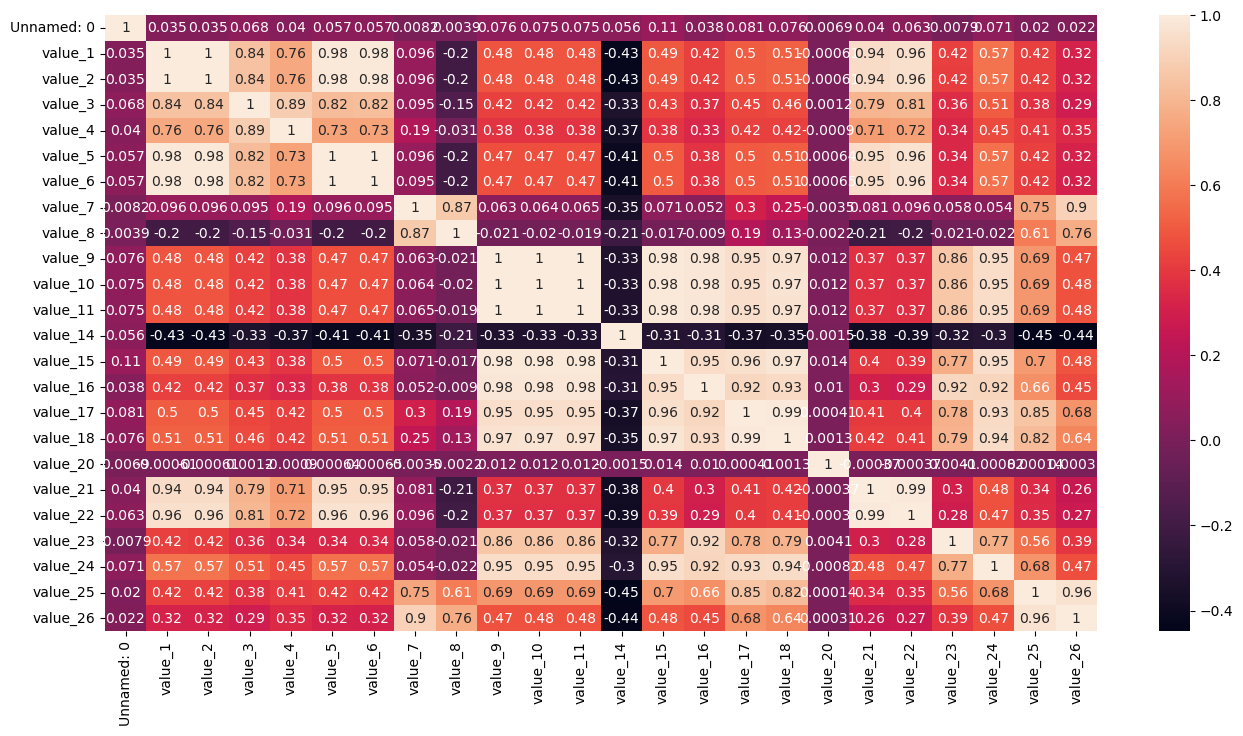

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(sensor_features.corr(),annot=True)
plt.show()

In [22]:
sensor_features.shape

(541440, 26)

In [23]:
sensor_numeric=sensor_features.select_dtypes(include=[np.number])

In [24]:
sensor_numeric.shape

(541440, 24)

In [25]:
vif=pd.DataFrame()
vif['VIF_Factor']=[variance_inflation_factor(sensor_numeric.values,i) for i in range(sensor_numeric.shape[1])]

In [26]:
vif["Features"]=sensor_numeric.columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,92089.605037,value_6
1,91568.463615,value_5
2,14261.375521,value_9
3,12469.265624,value_11
4,9745.180652,value_2
5,9629.410120,value_1
6,6387.340324,value_10
7,416.606636,value_18
8,243.552826,value_25
9,194.864014,value_15


There are many variables with VIF greater than 10. Lets remove the features with VIF more than 10 as the remaining features with VIF less than can expalian more than 90% of the variation in the data

In [27]:
#Iteratively check the VIF of all the features as the high VIF features get deleted iteratively
for ind in range(len(sensor_numeric.columns)):
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(sensor_numeric.values,i) for i in range(sensor_numeric.shape[1])]
    vif['Features']=sensor_numeric.columns
    multi=vif[vif['VIF_Factor']>10]

    if (multi.empty==False):
        df_sorted=multi.sort_values(by='VIF_Factor',ascending=False)
    else:
        print(vif)
        break


    if(df_sorted.empty==False):
        sensor_numeric=sensor_numeric.drop(df_sorted.Features.iloc[0],axis=1)
    else:
        print(vif)


    VIF_Factor    Features
0     1.043935  Unnamed: 0
1     6.633055     value_3
2     4.975185     value_4
3     6.312620     value_7
4     6.461470     value_8
5     1.434528    value_14
6     2.775722    value_15
7     1.000377    value_20
8     3.387088    value_21
9     2.576010    value_23
10    1.023330    value_26


In [28]:
sensor_numeric.head()

,Unnamed: 0,value_3,value_4,value_7,value_8,value_14,value_15,value_20,value_21,value_23,value_26
0,-1.732046,0.135179,0.168081,0.221587,0.374209,0.016893,0.504818,-0.076335,0.280210,0.019886,91.733589
1,-1.732040,0.138377,0.149947,0.221931,0.372755,-0.482703,0.504758,-0.076362,0.277716,0.018712,91.731514
2,-1.732033,0.128198,0.143556,0.222274,0.371300,-0.005489,0.504697,-0.076388,0.301374,0.017539,91.729446
3,-1.732027,0.131846,0.148518,0.222618,0.369846,0.182611,0.504637,-0.076415,0.282519,0.016366,91.727379
4,-1.732020,0.135493,0.147340,0.222962,0.368391,0.333765,0.504576,-0.076441,0.298590,0.015193,91.725311


Now we have features that doesnt show multicollinearity. we will use this data for creating our model

In [29]:
sensor_numeric.shape

(541440, 11)

For our study,lets create a model with full features and then later compare it with a model after multicollinearity is removed. First lets create a model with Full features

In [30]:
sensor_features.columns

Index(['Unnamed: 0', 'value_1', 'value_2', 'value_3', 'value_4', 'value_5',
       'value_6', 'value_7', 'value_8', 'value_9', 'value_10', 'value_11',
       'value_14', 'value_15', 'value_16', 'value_17', 'value_18', 'value_20',
       'value_21', 'value_22', 'value_23', 'value_24', 'value_25', 'value_26',
       'month', 'interval'],
      dtype='object')

In [34]:
#Seperate the numeric and categorical features
sensor_num=sensor_features.select_dtypes(include=[np.number])
sensor_cat=sensor_features.select_dtypes(include=[np.object])

In [35]:
#Create dummy variables for the categorical varibales
cat_encode=pd.get_dummies(data=sensor_cat,drop_first=True)

In [36]:
#lets check the encoded categorical data
cat_encode.sample(5)

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,interval_evening,interval_morning,interval_night
339264,0,1,0,0,0,0,0,0,0,0,0,1,0,0
273714,0,0,0,0,0,0,0,0,0,1,0,0,1,0
489942,0,0,0,0,0,0,0,1,0,0,0,0,0,1
115685,0,0,0,0,0,0,0,0,0,0,0,0,0,1
129758,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [37]:
#merge the dummy varibale data with the numeric data
sensor_final=pd.concat([sensor_num,cat_encode],axis=1)
sensor_final.sample(5)


,Unnamed: 0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,interval_evening,interval_morning,interval_night
307951,0.238205,0.235159,0.224245,0.271970,0.312086,-0.040888,-0.040376,0.657479,0.186388,-2.158583,...,0,0,0,0,1,0,0,0,1,0
139824,-0.837461,0.267016,0.276649,0.361089,0.365404,0.282240,0.274960,0.470114,0.383602,0.408360,...,0,0,0,1,0,0,0,0,1,0
462360,1.226104,0.245152,0.258171,0.200684,0.173845,0.336814,0.333698,-0.418981,-0.497959,0.379912,...,0,0,0,0,0,0,0,0,1,0
389904,0.762535,0.241282,0.242534,0.209245,0.247726,0.289407,0.289990,-1.060270,-1.348485,0.414216,...,0,0,0,0,0,0,0,0,0,0
182636,-0.563553,0.254267,0.255815,0.267775,0.275219,0.314471,0.311433,1.675463,1.596836,0.379912,...,0,1,0,0,0,0,0,0,0,0


In [41]:
X_Full=sensor_final.copy()
y_Full=sensor_target.copy()

In [45]:
#For linear regression, we need to add a constant term as a new columns. The constant term is nothing but the y intercept of a linear model
X_Full=sm.add_constant(X_Full)

In [46]:
#Split the data into train and test sets. set the random state to generate the same dataset everytime
X_train_Full,X_test_Full,y_train_Full,y_test_Full=train_test_split(X_Full,y_Full,random_state=1,test_size=0.3)

In [48]:
print('X_train_Full: ',X_train_Full.shape)
print('y_train_Full: ',y_train_Full.shape)
print('X_test_Full: ',X_test_Full.shape)
print('y_test_Full: ',y_test_Full.shape)

X_train_Full:  (379008, 39)
y_train_Full:  (379008,)
X_test_Full:  (162432, 39)
y_test_Full:  (162432,)


Lets Build a Multiple linear regression model

In [50]:
MLR_full_model=sm.OLS(y_train_Full,X_train_Full).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               value_19   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.788e+05
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:59:17   Log-Likelihood:             1.5660e+05
No. Observations:              379008   AIC:                        -3.131e+05
Df Residuals:                  378969   BIC:                        -3.127e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3084      0.061  

Lets go through the OLS output data. This is a linear regression model trained with 37 independent variables including the dummy variables. Some important observations from the output are as follows

1. R-squared: 0.974. This indicated that our model is explains 97.4% of the variance in the dependent variable. in other words it has captured 97.4% of the pattern in the data. this is very high.

2. Adj R-Squared: 0.974. The adjusted R-squared is almost same as the r-squared value. The adjusted R-squared is a parameter that takes into account the no of independent variables used for the model. A similar value for R-sqaured and Adj R-squared would mean that the model would not benifit from adding any more further independent variables.

3. F-statistic: The F-statistic is a number that tells how significant the model is as a whole. Significant meaning, signifcant relationship between the independent and dependent variables. This combined with a low p value indicates that the model as a whole is significant i.e the relationship between the independent and dependent variable is not by a random chance.

4. Prob (F-statistic): This is the p value associated with the F-statistic. With a low p value we can reject the null hypothesis that the model as a whole is not significant. Here the Null hypothesis would that the model is not signifcant. For any prediction problem, the Null hypothesis is that there is no pattern in the data that you can utilize to arrive at some degree of prediction. it means that there is no significant relationship between the independent and dependent variables and any relationship if found is only by pure chance. The whole gamut of data analysis is to establish there is indeed a significant reltionship between the independent and dependent variables and this relationship is not by chance, then you can reject the null Hypothesis. A low value of p simply means that there is a low probablity that the null hypothesis is true. 

5. Coefficients: These are the coefficients of the independent variable. Each coefficient represents the change in dependent variable for one unit change in the independent variable, given all variables remain unchanged.

6. P>|t|: These are the p values for the individual variables which represents how significant the relationship between this variable and the dependent variable. In other words it represents the statiscal significance of the variable in explaining the dependent variable. Remember that p value is the probablity of the null hypothesis being true. A p value for a variable represents its chance to be part of the null hypothesis i.e its relationship with the dependent variable not being significant. so a low p value means a low chance of its relationship with the dependent variable being not significant. Here most of the values are zero which means that these variables have a statistically signifiant relationship with the dependent variable.

7. AIC,BIC: these parameters measure the goodness of the fit of the model. Lower values of AIC and BIC indicate a good model.

Overall, the model seems to be higly significant, capable of explaining a significant portion of the variance of the dependent model. however before we make final conclusions about the model. There are still certain things that need to be checked, like the model residuals, which ensures that the model assumptions are met.

Previously we created a model with all the features in the dataset. Now lets create a model with only the significant variables.

In [64]:
sensor_sign=pd.concat([sensor_numeric,cat_encode],axis=1)
sensor_sign.shape

(541440, 25)

In [58]:
X_sign=sensor_sign.copy()
y_sign=sensor_target.copy()
X_sign=sm.add_constant(X_sign)

In [59]:
X_train_sign,X_test_sign,y_train_sign,y_test_sign=train_test_split(X_sign,y_sign,random_state=1,test_size=0.3)

In [61]:
print("X_train_sign:",X_train_sign.shape)
print("y_train_sign:",y_train_sign.shape)
print("X_test_sign:",X_test_sign.shape)
print("y_test_sign:",y_test_sign.shape)


X_train_sign: (379008, 26)
y_train_sign: (379008,)
X_test_sign: (162432, 26)
y_test_sign: (162432,)


In [63]:
MLR_model_sign=sm.OLS(y_train_sign,X_train_sign).fit()
print(MLR_model_sign.summary())

                            OLS Regression Results                            
Dep. Variable:               value_19   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 4.861e+05
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:58   Log-Likelihood:             1.2540e+05
No. Observations:              379008   AIC:                        -2.507e+05
Df Residuals:                  378982   BIC:                        -2.505e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5493      0.020  

This model is developed only with the significant variables which is visible in the number of variables 25 including the dummy variables for the categorical variables. Accordingly there is a slight reduction in the R-squared and Adj-R squared values. There is also an increase in the F-statistic which indicates that this model is more significant that the previous model. This is also evident in the p value for the variables. almost all variables have a p value of zero which means that these variables are much more signifiant that previous variables. 

Trivia: P value<0.05 means probablity of null hypothesis being true is 5%. i.e P(null) falls in the tail regions of the normal distribution which we are okay with because this is the error the model is allowed to make.

Now lets check the p values of the variables as estimated by the model with significant variables

In [70]:
MLR_Sign_Pvalues=pd.DataFrame(MLR_model_sign.pvalues,columns=['P-Value'])
MLR_Sign_Pvalues[MLR_Sign_Pvalues['P-Value']>0.05]

,P-Value


As we can see there are variables with p value greater than 0.05. Now lets get the pvalues from the model created from all the variables

In [85]:
MLR_Pvalues=pd.DataFrame(MLR_full_model.pvalues,columns=['P-Value'])
MLR_Pvalues[MLR_Pvalues['P-Value']>0.05]
insig_var=MLR_Pvalues[MLR_Pvalues['P-Value']>0.05]
insig_var=insig_var.index
insig_var.to_list()

['value_11']

Till this point we were able to identify signifcant variables and were able to create a statistically significant model that can explain almost 98% of the variance of the dependent variable. Our model is ready to make predictions now. So lets make some predictions

In [86]:
y_pred_sign=MLR_model_sign.predict(X_test_sign)

A simple way to check our model is to check the residuals. The residuals should not show any specific pattern in their distribution, if they show any pattern, it means that some of the model variance that was supposed to captured by the model is lost in the residuals and predictions will not be accurate.

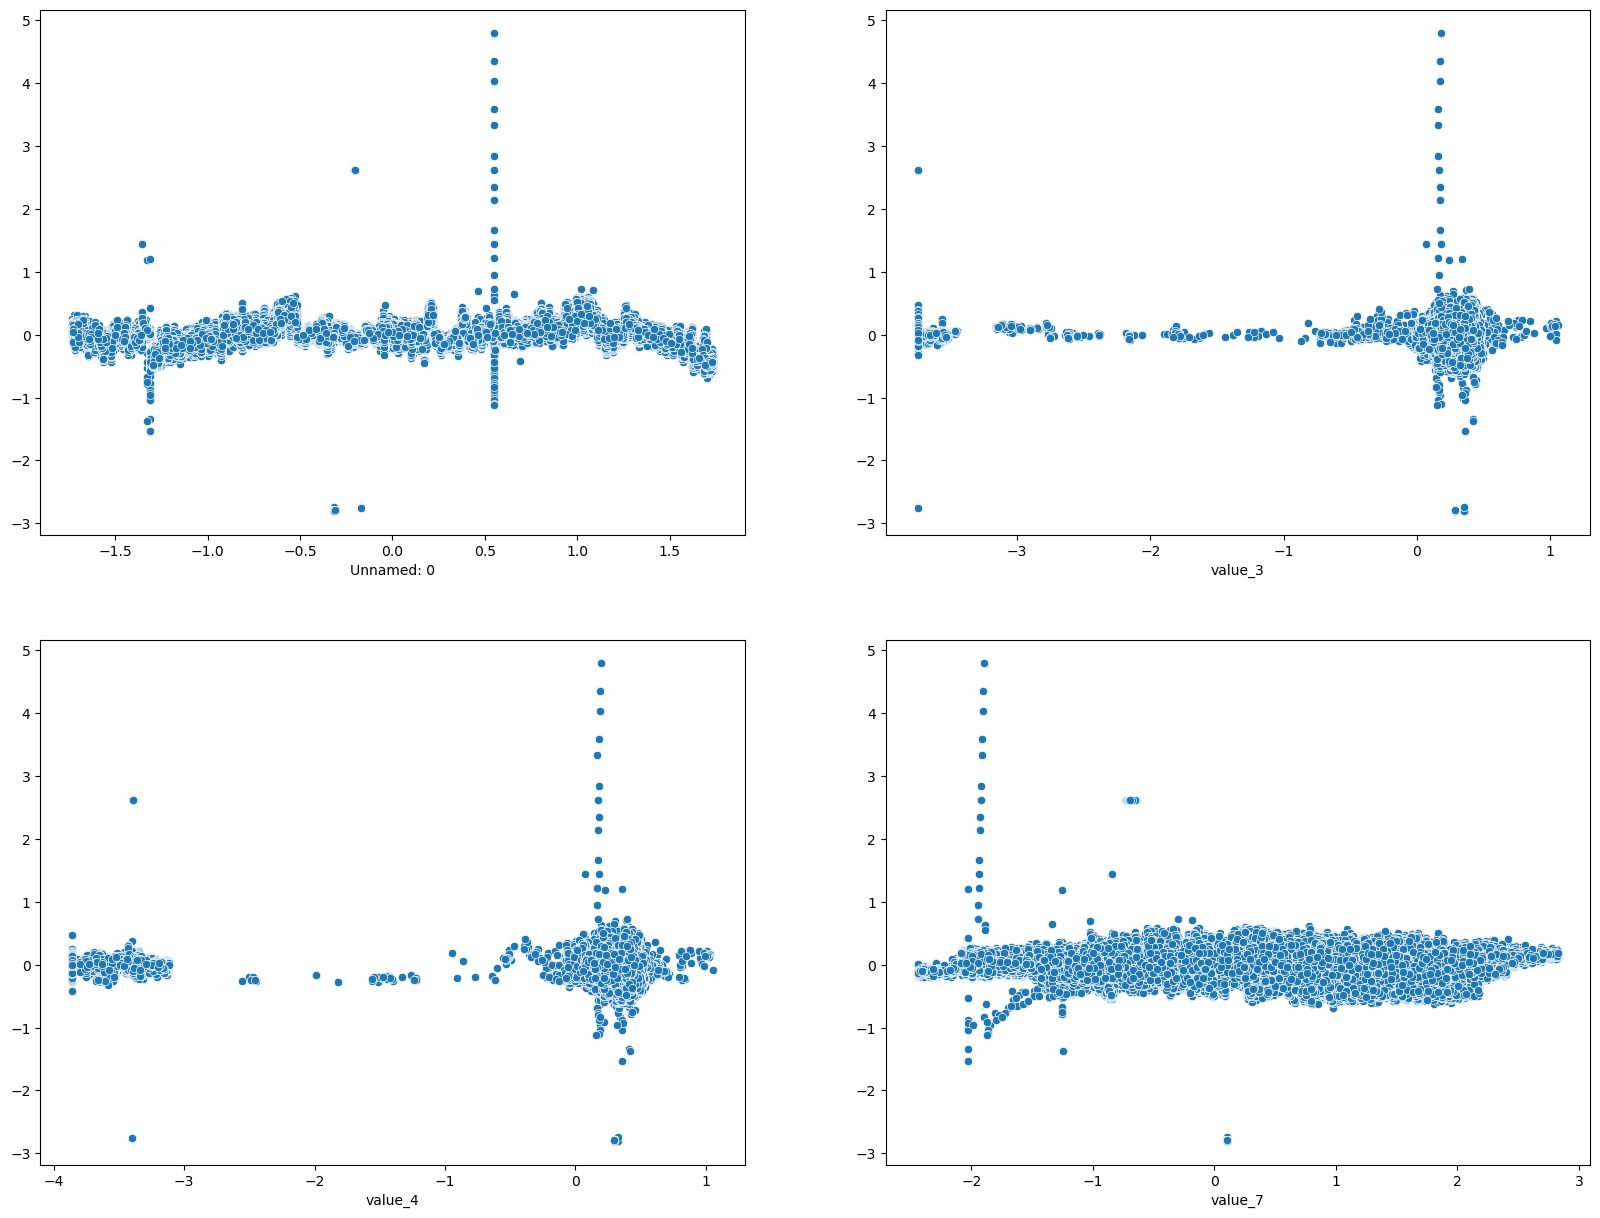

In [95]:
fig, ax=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
for var,subplot in zip(X_train_sign.columns[1:5],ax.flatten()):
    sns.scatterplot(x=X_train_sign[var],y=MLR_model_sign.resid,ax=subplot)

plt.show()

The above plots no specific pattern, hence we can assume our model has captured most of  the variance and the assumption of linear model is valid. We can also check the residuals from the model summary itself. The autocorrelation if any in the residuals is given by  the Durbin-Watson paramter. A value of close to 2 means no autocorrelation and a value between 0 and 2 would mean postive correlation and value between 2 and 4 would mean negative correlation. Lets get the model summary again

### Autocorrelation

In [96]:
print(MLR_model_sign.summary())

                            OLS Regression Results                            
Dep. Variable:               value_19   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 4.861e+05
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:13:40   Log-Likelihood:             1.2540e+05
No. Observations:              379008   AIC:                        -2.507e+05
Df Residuals:                  378982   BIC:                        -2.505e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5493      0.020  

We can see the Durbin-Watson parameter is very close to 2. This means there is no autocorrelation amoung the residuals

### heteroskedascity